In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

%matplotlib inline

import plotly.graph_objs as go
import plotly. express as px
from plotly.subplots import make_subplots
import time

# Задание Ultra Lite

1. С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z*(12-z) + 5*y/z  равна 0 (символ ^2 - возведение в квадрат). Интервал изменения каждой переменной x, y, z. Выведите на экран значение этой точки и значение функции в ней.

2. Проведите анализ скорости сходимости до заданной вами точности:

А. Выберите три разные размера популяции.

Б. Выберите три разные коэффициента мутации.

В. Выберите три разных количества выживших.
 

## 1. С помощью генетического алгоритма найдите точку, где функция от трёх переменных: f = x^2/y + z*(12-z) + 5*y/z  равна 0 (символ ^2 - возведение в квадрат). Интервал изменения каждой переменной x, y, z. Выведите на экран значение этой точки и значение функции в ней.

Создаем дополнительные функции (по примеру ноутбука)

In [ ]:
'''
    Функция получения выжевшей популяции
      Входные параметры:
        popul - текущая популяция
        val - текущие значения
        nsurv -  количество выживших
        reserve - максимизация или минимизация
'''

def getSurvPopul(popul, val, nsurv, reverse):
  newpopul = []
  # сортируем в нужном порядке - минимизация или максимизация
  sval = sorted(val, reverse=reverse)
  for i in range(nsurv):
    index = val.index(sval[i])
    newpopul.append(popul[index])
  return newpopul, sval

'''
    Функция получения родителей
      Входные параметры:
      - curr_popul - текущая популяция
      - nsurv - количество выживших
'''

def getParents(curr_popul, nsurnv):
  # задаем индексы выживших особей 0 - 19
  indexp1 = random.randint(0, nsurv - 1)
  indexp2 = random.randint(0, nsurv - 1)
  botp1 = curr_popul[indexp1]
  botp2 = curr_popul[indexp2]
  return botp1, botp2

'''
    Функция смешивания двух родителей
      Входые параметры:
       - botp1 - первый бот-родитель
       - botp2 - второй бот-родитель
       - j - номер компонента бота
'''

def crossPointFrom2Parents(botp1, botp2,j):
  # случайное число в диапазоне от 0 до 1
  pindex = random.random()

  if pindex < 0.5:
    x = botp1[j]
  else:
    x = botp2[j]
  return x

Задаем параметры для генетического алгоритма

In [ ]:
n = 100 # размер популяции
nsurv = 20 # количество выживших
nnew = n - nsurv # сколько нужно сгенерить, после того как мы выберем выживших
l = 12 # длина бота
epochs = 500
mut = 0.25 # коэффициент мутаций

Подключаем генетический алгоритм

In [ ]:
# сгенерить популяцию
popul = [] # 100 ботов - строки, 12 - столбцы (каждое значение разворачивается на 4)
# 12 - для числа ботов
val = [] # массив значений этих ботов

for i in range(n):
  # создание пустого бота [[]]
  popul.append([])
  for j in range(l):
    # в каждый компонент указываем рандомное значение от 0 до 1
    popul[i].append(random.random())

for it in range(epochs):
  val = []

  for i in range(n):
    bot = popul[i]

    # bot = [x,x,x,x,y,y,y,y,z,z,z,z]
    x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
    y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
    z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
    f = x**2/y + z*(12-z) + 5*y/z 
    val.append(abs(f))

  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
  # вывод 5ти лучших ботов
  print(it, " ", [round(s,l) for s in sval[0:5]])

  for i in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []
    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j)
      # добавляем случайную величину к значению бота
      x += mut*(2*random.random() - 1.0)
      newbot.append(x)
    newpopul.append(newbot)
  
  popul = newpopul

0   [5.577124024004, 5.839524197601, 7.702362657382, 9.027371696025, 9.127573204404]
1   [1.24684886932, 2.80404140375, 5.577124024004, 5.839524197601, 7.230578509811]
2   [1.24684886932, 2.477263069006, 2.80404140375, 4.05134585885, 4.692990805187]
3   [1.151602091472, 1.24684886932, 1.64400680791, 1.94840530715, 2.477263069006]
4   [1.151602091472, 1.24684886932, 1.64400680791, 1.94840530715, 2.477263069006]
5   [1.151602091472, 1.24684886932, 1.553369407873, 1.64400680791, 1.94840530715]
6   [1.151602091472, 1.24684886932, 1.553369407873, 1.64400680791, 1.94840530715]
7   [1.151602091472, 1.24684886932, 1.527308753012, 1.553369407873, 1.64400680791]
8   [1.151602091472, 1.24684886932, 1.527308753012, 1.553369407873, 1.64400680791]
9   [0.011951418204, 1.151602091472, 1.24684886932, 1.35397340741, 1.527308753012]
10   [0.011951418204, 0.896089936897, 1.151602091472, 1.24684886932, 1.35397340741]
11   [0.011951418204, 0.896089936897, 0.913804919537, 0.91522333739, 1.151602091472]
12  

Отображаем лучшего бота и выводим на экран значение этой точки и значение функции в ней

In [ ]:
bot = popul[0]
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
f = x**2/y + z*(12-z) + 5*y/z 
print(bot)
print("x =", x, " y =", y, " z = ", z)
print("f =",f)

[0.8098064024081733, 1.2326298990607645, 0.23252479896291084, 1.0297267577039881, 0.22664689104841357, -0.015357242728812281, 0.16620105200617402, 0.4277987679886758, 0.7997312150436645, 0.5009164173547136, 0.5655483487901483, 0.35099410811222875]
x = 35.041372829940805  y = 12.506840397182987  z =  17.734649492524433
f = 0.002202965040129623


Выведем 20 лучших ботов - значения точек и значение функции в этих точках

In [ ]:
for i in range(20):
  bot = popul[i]
  x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
  y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
  z = bot[8] + 5*bot[9] + 10*bot[10] + 25*bot[11]
  f = x**2/y + z*(12-z) + 5*y/z 
  print("x =", x, " y =", y, " z = ", z)
  print("f =",f)

x = 35.041372829940805  y = 12.506840397182987  z =  17.734649492524433
f = 0.002202965040129623
x = 21.399471289223516  y = 28.00413640456371  z =  13.901686533617337
f = -0.011951418203757669
x = 2.8695828348424994  y = 23.64577803723143  z =  12.75321079526438
f = 0.012907744058907156
x = 18.306224830110985  y = 25.344023564601674  z =  13.650074897966277
f = -0.017414667993795874
x = 14.721478615422935  y = 7.754314518629201  z =  14.165057874751815
f = 0.017518661028922633
x = 33.123563900279876  y = 14.079307741841872  z =  16.866449069721956
f = 0.021917856282231973
x = 20.47321303932081  y = 15.753616319566774  z =  14.252938893482778
f = 0.02218952459906287
x = -1.83116006691764  y = 33.531328561156755  z =  13.00130361512669
f = -0.0228801756761996
x = 32.73228965080786  y = 14.92855589383231  z =  16.59679682595293
f = -0.025999814813837396
x = 5.664248779075196  y = 31.33622408416662  z =  13.003305413068523
f = 0.02689734428142465
x = -5.85550363574027  y = -1.259203751725

## 2. Проведите анализ скорости сходимости до заданной вами точности:

А. Выберите три разные размера популяции.

Б. Выберите три разные коэффициента мутации.

В. Выберите три разных количества выживших.

### А. Выберите три разные размера популяции.

Создаем функцию для запуска генетического алгоритма

In [ ]:
def funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy):

  startTime = time.time()

  popul = []
  val = []

  nnew = n - nsurv

  for i in range(n):
   # создание пустого бота [[]]
    popul.append([])
    for j in range(l):
      # в каждый компонент указываем рандомное значение от 0 до 1
      popul[i].append(random.random())
  
  speedacc = 0

  for it in range(epochs):
    val = []
    

    for i in range(n):
      bot = popul[i]

      # bot = [x,x,x,x,y,y,y,y,z,z,z,z]
      x = bot[0] + koef*bot[1] + koef*2*bot[2] + koef*5*bot[3]
      y = bot[4] + koef*bot[5] + koef*2*bot[6] + koef*5*bot[7]
      z = bot[8] + koef*bot[9] + koef*2*bot[10] + koef*5*bot[11]
      f = x**2/y + z*(12-z) + 5*y/z 
      val.append(abs(f))

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
  
    bestbot = sval[0]

    if bestbot > accuracy:
      speedacc += 1
    
    for i in range(nnew):
      botp1, botp2 = getParents(newpopul, nsurv)
      newbot = []
      for j in range(l):
        x = crossPointFrom2Parents(botp1, botp2, j)
        # добавляем случайную величину к значению бота
        x += mut*(2*random.random() - 1.0)
        newbot.append(x)
      newpopul.append(newbot)
    
    popul = newpopul

  for i in range(1):
    bot = popul[i]
    x = bot[0] + koef*bot[1] + koef*2*bot[2] + koef*5*bot[3]
    y = bot[4] + koef*bot[5] + koef*2*bot[6] + koef*5*bot[7]
    z = bot[8] + koef*bot[9] + koef*2*bot[10] + koef*5*bot[11]
    f = x**2/y + z*(12-z) + 5*y/z 
    print("Значение функции лучшего бота f =", f)
  
  endTime = time.time() #время конца замера
  totalTime = endTime - startTime #вычисляем затраченное время

  if speedacc < epochs:
    print('Скорость схождения ', speedacc, ' эпох')
  else:
    print('Точность ', accuracy, ' не была достигнута')

  print("Время, затраченное на выполнение данного кода = ", totalTime)

Сделали функцию для анализа скорости - а именно останавливать алгоритм, когда заданная точность была достигнута

Пусть точность будет равна accuracy = 0.005

In [ ]:
accuracy = 0.005

Напомним исходные значения параметров

In [ ]:
n = 100 # размер популяции
nsurv = 20 # количество выживших
nnew = n - nsurv # сколько нужно сгенерить, после того как мы выберем выживших
l = 12 # длина бота
epochs = 500
mut = 0.25 # коэффициент мутаций
koef = 5 # множитель

Будем изменять n - размер популяции

In [ ]:
n = 50
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.013970354253233452
Точность  0.005  не была достигнута
Время, затраченное на выполнение данного кода =  0.2093665599822998


In [ ]:
n = 100
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.003343575740675675
Скорость схождения  341  эпох
Время, затраченное на выполнение данного кода =  0.5118911266326904


In [ ]:
n = 200
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.0005912526840567978
Скорость схождения  40  эпох
Время, затраченное на выполнение данного кода =  1.1328446865081787


In [ ]:
n = 300
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.000827009344073204
Скорость схождения  142  эпох
Время, затраченное на выполнение данного кода =  1.813450574874878


In [ ]:
n = 500
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.00022533923072121098
Скорость схождения  97  эпох
Время, затраченное на выполнение данного кода =  3.066681146621704


In [ ]:
n = 1000
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 0.0002145571391370671
Скорость схождения  60  эпох
Время, затраченное на выполнение данного кода =  6.4663002490997314


In [ ]:
n = 5000
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -9.251015669065055e-07
Скорость схождения  5  эпох
Время, затраченное на выполнение данного кода =  34.375492334365845


Сделаем выводы по данному анализу: сведем в таблицу результаты



In [ ]:
df = pd.DataFrame([[50, -0.0139, 'не достигнута', 0.209],
                  [100, -0.0033, 341, 0.511],
                  [200, -0.00059, 40, 1.32],
                   [300, -0.000827, 142, 1.81],
                   [500, -0.000225, 97, 3.006],
                   [1000, 0.0002145, 60, 6.46],
                   [5000, -9.25e-07, 5, 34.37]],
columns=['Размер популяции n','Значение функции f','Скорость схождения (число эпох)','Время выполнения, сек'])

In [ ]:
df

,Размер популяции n,Значение функции f,Скорость схождения (число эпох),"Время выполнения, сек"
0,50,-1.390000e-02,не достигнута,0.209
1,100,-3.300000e-03,341,0.511
2,200,-5.900000e-04,40,1.320
3,300,-8.270000e-04,142,1.810
4,500,-2.250000e-04,97,3.006
5,1000,2.145000e-04,60,6.460
6,5000,-9.250000e-07,5,34.370


Мы прогоняли данные алгоритмы один раз и получили следующие результаты, которые сведены в таблицу выше:
В итоге получили, что среднее значение размера популяции для данной задачи равно n=200
Выигрываем по скорости, да и скорость сходимости неплохая.

При большом числе популяций - быстрота схождения, хорошая точность (значение функции), но приходится жертвовать временем выполнения.

### Б. Выберите три разные коэффициента мутации.

Бдуем менять коэффициент мутации при той же точности accuracy = 0.005, число популяций n = 200

In [ ]:
accuracy = 0.005
n = 200

In [ ]:
mut = 0.05
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -5.259882992358911e-05
Скорость схождения  18  эпох
Время, затраченное на выполнение данного кода =  1.1683776378631592


In [ ]:
mut = 0.1
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.0006249815996408614
Скорость схождения  20  эпох
Время, затраченное на выполнение данного кода =  1.153449535369873


In [ ]:
mut = 0.2
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 0.0011324265056842364
Скорость схождения  61  эпох
Время, затраченное на выполнение данного кода =  1.1972739696502686


In [ ]:
mut = 0.25
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.0014086948016771572
Скорость схождения  159  эпох
Время, затраченное на выполнение данного кода =  1.1424577236175537


In [ ]:
mut = 0.5
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 0.0011100455039692037
Скорость схождения  129  эпох
Время, затраченное на выполнение данного кода =  1.1442523002624512


In [ ]:
mut = 0.9
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.0036984866787115322
Скорость схождения  154  эпох
Время, затраченное на выполнение данного кода =  1.162794589996338


In [ ]:
df = pd.DataFrame([[0.05, -5.259e-05, 18, 1.168],
                  [0.1, -0.000624, 20, 1.153],
                  [0.2, -0.0011, 61, 1.19],
                   [0.25, -0.0014, 159, 1.142],
                   [0.5, -0.00111, 129, 1.144],
                   [0.9, -0.00369, 154, 1.16]],
columns=['Коэффициент мутации mu','Значение функции f','Скорость схождения (число эпох)','Время выполнения, сек'])

In [ ]:
df

,Коэффициент мутации mu,Значение функции f,Скорость схождения (число эпох),"Время выполнения, сек"
0,0.05,-0.000053,18,1.168
1,0.10,-0.000624,20,1.153
2,0.20,-0.001100,61,1.190
3,0.25,-0.001400,159,1.142
4,0.50,-0.001110,129,1.144
5,0.90,-0.003690,154,1.160


С увеличение коэффициента мутации падает скорость схождения и соответственно точность ниже. На время не влияет

### В. Выберите три разных количества выживших.

In [ ]:
accuracy = 0.005
n = 200
mut = 0.1

In [ ]:
nsurv = 5
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.001166222789036997
Скорость схождения  24  эпох
Время, затраченное на выполнение данного кода =  1.2425365447998047


In [ ]:
nsurv = 10
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = -0.0001437491323024176
Скорость схождения  9  эпох
Время, затраченное на выполнение данного кода =  1.192990779876709


In [ ]:
nsurv = 25
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 0.001803570224421236
Скорость схождения  251  эпох
Время, затраченное на выполнение данного кода =  1.203744649887085


In [ ]:
nsurv = 50
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 1.58888097150367e-05
Скорость схождения  59  эпох
Время, затраченное на выполнение данного кода =  1.0001626014709473


In [ ]:
nsurv = 100
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 0.00022539782498931515
Скорость схождения  29  эпох
Время, затраченное на выполнение данного кода =  0.7543973922729492


In [ ]:
nsurv = 150
funcGeneticParam(n, nsurv, l, epochs, mut, koef, accuracy)

Значение функции лучшего бота f = 0.0005812009415695485
Скорость схождения  493  эпох
Время, затраченное на выполнение данного кода =  0.5467696189880371


In [ ]:
df = pd.DataFrame([[5, -0.0011, 24, 1.24],
                  [10, -0.000143, 9, 1.19],
                  [25, -0.0018, 251, 1.20],
                   [50, 1.588e-05, 59, 1.0001],
                   [100, 0.000225, 29, 0.754],
                   [150, 0.000581, 493, 0.54]],
columns=['Количество выживших nsurv','Значение функции f','Скорость схождения (число эпох)','Время выполнения, сек'])

In [ ]:
df

,Количество выживших nsurv,Значение функции f,Скорость схождения (число эпох),"Время выполнения, сек"
0,5,-0.001100,24,1.2400
1,10,-0.000143,9,1.1900
2,25,-0.001800,251,1.2000
3,50,0.000016,59,1.0001
4,100,0.000225,29,0.7540
5,150,0.000581,493,0.5400


Чем ближе число выживших к размеру популяции тем быстрее обрабатывается код (логично, меньше генерить новых ботов)
Лучшая точность когда число выживших составило 1/4 от размера популяции

# Задание Lite

1. Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределения грузов по поездам:

А. Поезда: 1, 12, 72, 4, 55, 1

Б. Грузы: 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

2. Решите задачу расстановки грузов по поездам с дополнительным условием: нужно заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):

А. Поезда: 10, 10, 10, 12, 12, 12

Б. Грузы: 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

Подключим функции

In [ ]:
'''
    Функция получения выжевшей популяции
      Входные параметры:
        popul - текущая популяция
        val - текущие значения
        nsurv -  количество выживших
        reserve - максимизация или минимизация
'''

def getSurvPopul(popul, val, nsurv, reverse):
  newpopul = []
  # сортируем в нужном порядке - минимизация или максимизация
  sval = sorted(val, reverse=reverse)
  for i in range(nsurv):
    index = val.index(sval[i])
    newpopul.append(popul[index])
  return newpopul, sval

'''
    Функция получения родителей
      Входные параметры:
      - curr_popul - текущая популяция
      - nsurv - количество выживших
'''

def getParents(curr_popul, nsurnv):
  # задаем индексы выживших особей 0 - 19
  indexp1 = random.randint(0, nsurv - 1)
  indexp2 = random.randint(0, nsurv - 1)
  botp1 = curr_popul[indexp1]
  botp2 = curr_popul[indexp2]
  return botp1, botp2

'''
    Функция смешивания двух родителей
      Входые параметры:
       - botp1 - первый бот-родитель
       - botp2 - второй бот-родитель
       - j - номер компонента бота
'''

def crossPointFrom2Parents(botp1, botp2,j):
  # случайное число в диапазоне от 0 до 1
  pindex = random.random()

  if pindex < 0.5:
    x = botp1[j]
  else:
    x = botp2[j]
  return x

## 1. Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределения грузов по поездам:

А. Поезда: 1, 12, 72, 4, 55, 1

Б. Грузы: 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

In [ ]:
train = np.array([1, 12, 72, 4, 55, 1]) # вместимость каждого поезда
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) # грузы

print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

145
145
(6,)
(18,)


In [ ]:
n = 200
nsurv = 20
nnew = n - nsurv
epohs = 2500
mut = 0.4

In [ ]:
l = size.shape[0]
trains = train.shape[0]

In [ ]:
popul = [] 
val = [] 

plotmeanval = [] 
plotminval = [] 
 
for i in range(n): 
    popul.append([]) 
    for j in range(l): 
        
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): 

    if (it == 500): 
        mut = 0.1   
    if (it == 1000): 
        mut = 0.05  

    val = [] 
    for i in range(n): 
        bot = popul[i] 
        trainfill = np.array([0, 0, 0, 0, 0, 0]) 
        for j in range(l): 
            trainfill[bot[j]] += size[j]       
        
        f = 0 
        for t in range(trains):
            f += abs(train[t] - trainfill[t]) 
        val.append(f)   
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  
    plotmeanval.append(sum(val) / len(val)) 
    plotminval.append(sval[0]) 
    
    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv) 
        newbot = [] 
    
        for j in range(l):
            x = crossPointFrom2Parents(botp1, botp2, j) 

            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)    
        newpopul.append(newbot) 
    popul = newpopul 

0   163.96   [54, 62, 62, 82, 82, 86, 90, 90, 90, 92, 96, 100, 100, 102, 104, 104, 106, 108, 108, 108]
1   123.46   [24, 32, 38, 40, 42, 54, 58, 58, 62, 62, 68, 68, 72, 72, 74, 78, 78, 78, 80, 80]
2   103.77   [24, 32, 32, 34, 34, 38, 38, 40, 40, 42, 42, 42, 48, 50, 50, 52, 52, 54, 54, 54]
3   91.43   [24, 28, 30, 30, 32, 32, 32, 34, 34, 34, 34, 36, 36, 38, 38, 38, 40, 40, 40, 40]
4   84.49   [16, 24, 24, 28, 30, 30, 30, 30, 32, 32, 32, 32, 32, 32, 34, 34, 34, 34, 34, 36]
5   81.5   [14, 16, 24, 24, 24, 24, 26, 26, 26, 26, 26, 28, 28, 28, 28, 30, 30, 30, 30, 30]
6   80.29   [8, 12, 14, 16, 18, 20, 22, 22, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26]
7   75.35   [8, 12, 12, 14, 16, 16, 18, 20, 20, 20, 20, 22, 22, 22, 22, 22, 24, 24, 24, 24]
8   73.59   [8, 12, 12, 14, 16, 16, 16, 18, 18, 20, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22]
9   75.91   [6, 8, 8, 12, 12, 14, 14, 16, 16, 16, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20]
10   75.45   [6, 8, 8, 12, 12, 12, 14, 14, 16, 16, 16, 18, 18, 18

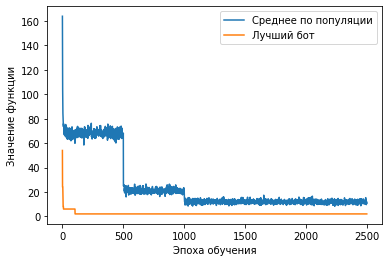

In [ ]:
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=plotmeanval, name="среднее по популяции"))
fig.add_trace(go.Scatter(y=plotminval, name="лучший бот"))


fig.update_traces(hoverinfo="all", hovertemplate="x: %{x}<br>y: %{y}")
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Графики",
                  xaxis_title="Эпоха обучения",
                  yaxis_title="Значение функции"
                  )

fig.show()

In [ ]:
bot = popul[0] 
print ('Значения лучшего бота:', bot) 

trainfill = np.zeros(trains, dtype = 'int32') 
for j in range(l): 
    trainfill[bot[j]] += size[j] 

print ('Вместимость поездов по боту:', trainfill) 
print ('Реальная вместимость поездов:', train) 

Значения лучшего бота: [3, 5, 4, 1, 1, 2, 3, 2, 0, 2, 4, 4, 1, 2, 2, 2, 4, 4]
Вместимость поездов по боту: [ 1 12 73  4 54  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


## 2. Решите задачу расстановки грузов по поездам с дополнительным условием: нужно заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):

А. Поезда: 10, 10, 10, 12, 12, 12

Б. Грузы: 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

In [ ]:
train = np.array([10, 10, 10, 12, 12, 12]) # вместимость каждого поезда
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) # грузы

print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

66
54
(6,)
(18,)


In [ ]:
n = 200
nsurv = 20
nnew = n - nsurv
epohs = 2500
mut = 0.4

In [ ]:
l = size.shape[0]
trains = train.shape[0]

In [ ]:
popul = [] 
val = [] 

plotmeanval = [] 
plotminval = [] 
 
for i in range(n): 
    popul.append([]) 
    for j in range(l): 
        
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): 

    if (it == 500): 
        mut = 0.1   
    if (it == 1000): 
        mut = 0.05  

    val = [] 
    for i in range(n): 
        bot = popul[i] 
        trainfill = np.array([0, 0, 0, 0, 0, 0]) 
        for j in range(l): 
            trainfill[bot[j]] += size[j]       
        
        f = 0 
        for t in range(trains):
            f += abs(train[t] - trainfill[t]) 
        val.append(f)   
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  
    plotmeanval.append(sum(val) / len(val)) 
    plotminval.append(sval[0]) 
    
    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv) 
        newbot = [] 
    
        for j in range(l):
            x = crossPointFrom2Parents(botp1, botp2, j) 

            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)    
        newpopul.append(newbot) 
    popul = newpopul 

0   29.51   [12, 12, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18]
1   26.14   [12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16]
2   24.29   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
3   24.28   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14]
4   23.91   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
5   22.0   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
6   23.71   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
7   22.89   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
8   23.39   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
9   22.41   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
10   21.61   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=plotmeanval, name="среднее по популяции"))
fig.add_trace(go.Scatter(y=plotminval, name="лучший бот"))


fig.update_traces(hoverinfo="all", hovertemplate="x: %{x}<br>y: %{y}")
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Графики",
                  xaxis_title="Эпоха обучения",
                  yaxis_title="Значение функции"
                  )

fig.show()

In [ ]:
bot = popul[0] 
print ('Значения лучшего бота:', bot) 

trainfill = np.zeros(trains, dtype = 'int32') 
for j in range(l): 
    trainfill[bot[j]] += size[j] 

print ('Вместимость поездов по боту:', trainfill) 
print ('Реальная вместимость поездов:', train) 

Значения лучшего бота: [4, 4, 3, 4, 2, 4, 2, 4, 3, 3, 0, 5, 0, 1, 4, 5, 1, 2]
Вместимость поездов по боту: [ 7 10 10  7 12  8]
Реальная вместимость поездов: [10 10 10 12 12 12]


In [ ]:
train.mean()

11.0

In [ ]:
train.std()

1.0

In [ ]:
trainfill.mean()

9.0

In [ ]:
trainfill.std()

1.8257418583505538

Максимально равномерно расставить грузы.



Как сделать выборку по максимально к равномерному распределению.

Равномерный закон распределения описывается функцией 
f(x)=1/(b-a), где x в пределах (b-a)

mean - математическое ожидание

std - мера рассеивания случайной величины вокруг математического ожидания 

чтобы значения были максимально равномерные, нужно стремиться к тому, чтобы std было минимальное

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



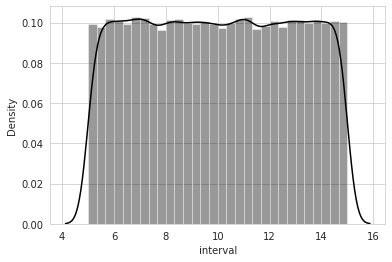

In [ ]:
from scipy.stats import uniform
import seaborn as sb

data = uniform.rvs(size = 100000, loc = 5, scale=10)
# с 5 - 10 значений

sb.set_style('whitegrid')
ax = sb.distplot(data, bins = 30, color = 'k')
ax.set(xlabel = 'interval')
plt.show()

In [ ]:
# Сделали свою функцию - минимизация std

def getSurvPopulStd(popul, val, nsurv, reverse):
  newpopul = []
  # сортируем в нужном порядке - минимизация или максимизация
  sval = sorted(val, reverse=reverse)
  for i in range(nsurv):
    index = val.index(sval[i])
    newpopul.append(popul[index])
  return newpopul, sval

In [ ]:
popul = [] 
val = [] 

plotmeanval = [] 
plotminval = [] 
 
for i in range(n): 
    popul.append([]) 
    for j in range(l): 
        
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): 

    if (it == 500): 
        mut = 0.1   
    if (it == 1000): 
        mut = 0.05  

    val = [] 
    for i in range(n): 
        bot = popul[i] 
        trainfill = np.array([0, 0, 0, 0, 0, 0]) 
        for j in range(l): 
            trainfill[bot[j]] += size[j]       
        
        f = 0 
        for t in range(trains):
            f += abs(train[t] - trainfill[t]) 

        val.append(trainfill.std())  
    
    newpopul, sval = getSurvPopulStd(popul, val, nsurv, 0)

    for i in range(nnew): 
        botp1, botp2 = getParents(newpopul, nsurv) 
        newbot = [] 

        for j in range(l):
            x = crossPointFrom2Parents(botp1, botp2, j) 

            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)    
        newpopul.append(newbot) 

    popul = newpopul

In [ ]:
bot = popul[0] 
print ('Значения лучшего бота:', bot) 

trainfill = np.zeros(trains, dtype = 'int32') 
for j in range(l): 
    trainfill[bot[j]] += size[j] 

print ('Вместимость поездов по боту:', trainfill) 
print ('Реальная вместимость поездов:', train) 

Значения лучшего бота: [2, 2, 1, 0, 5, 1, 0, 5, 4, 4, 2, 4, 3, 2, 5, 3, 1, 0]
Вместимость поездов по боту: [9 9 9 9 9 9]
Реальная вместимость поездов: [10 10 10 12 12 12]


In [ ]:
trainfill.sum()

54

Получили равномерное распределение грузов по вагонам

# Задание Pro

Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте три класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались.

Нужно расставить индексы точек, определить, к какому классу относится какая точка с помощью генетического алгоритма. В результате каждый класс должен состоять из точек одного и того же индекса.

Визуализируйте процесс обучения и итоговый результат.
 

In [ ]:
# выберем центры классов на достаточном расстоянии
center = [[1,7,1], [3,0,3], [7,5,4]]
# число точек для каждого класса
nclaster = [100, 125, 150]
# число кластеров
kolclaster = 3

In [ ]:
# указываем разброс случайных значений для x
kx = [0.45, 0.35, 0.8]
# указываем разброс случайных значений для y
ky = [0.55, 0.75, 0.35]
# указываем разброс случайных значений для z
kz = [0.85, 0.45, 0.55]

In [ ]:
data = []
colorclass = []

for i in range(kolclaster):
  for j in range(nclaster[i]):
    x = center[i][0] + kx[i]*random.normalvariate(0,1)
    y = center[i][1] + ky[i]*random.normalvariate(0,1)
    z = center[i][2] + kz[i]*random.normalvariate(0,1)
    c = i
    data.append([x,y,z])
    colorclass.append(c)

data = np.array(data)
print(data.shape)
colorclass = np.array(colorclass)
print(colorclass.shape)

(375, 3)
(375,)


In [ ]:
fig = px.scatter_3d(x=data[:,0], y=data[:,1], z=data[:,2], color=colorclass, title="Трехмерное представление кластеров")
fig.show()

In [ ]:
# функции для создания бота
def createBot():
  bot = np.array([random.randint(0,2) for i in range(data.shape[0])])
  return bot

# функции для отрисовки нового бота
def plotBot(bot):
  plotData = []
  color_class = []
  for i in range(kolclaster):
    plotData.extend(data[bot==i,:])
  
  plotData = np.array(plotData)
  fig = px.scatter_3d(x=plotData[:,0], y=plotData[:,1], z=plotData[:,2], color=colorclass, title="Трехмерное представление кластеров")
  fig.show()

# метрика - евклидово расстояние
def getPointError(x, c):
  return np.sum((x-c)**2)

# функция - получения расстояния
def getDist(x1, x2):
  return np.sum((x1-x2)**2)

# для дружественных точек 
def getPointErrorFriends(x, cl, data, bot):
  data_friends = data[cl, :]
  dist = [getDist(x, d) for d in data_friends]
  min_dist = min(dist)
  return min_dist

# для нахождения расстояния до точек другого класса
def getPointErrorAgr(x, cl, data, bot):
  data_error = []
  for cls in range(3):
    if (cls != cl):
      data_error.extend(list(data[cls,:]))
  dist = [getDist(x, d) for d in data_error]
  min_dist = min(dist)
  return 1/(min_dist + 1e-3)

# функция для расчета ошибки бота
def getBotError(bot):
  center_all = []
  for i in range(kolclaster):
    classData = data[bot==i,:]
    center_all.append(np.mean(classData, axis=0))
  error = 0

  for i in range(data.shape[0]):
    cc = center_all[bot[i]]
    add_error = getPointError(data[i], cc)
    add_error = add_error * getPointErrorFriends(data[i], bot[i], data, bot)
    add_error = add_error * getPointErrorAgr(data[i], bot[i], data, bot)
    error = error + add_error

  error = error / data.shape[0]
  return error

# создаем бота
bot = createBot()
# выводим ошибку
print(getBotError(bot))
# отрисовка
plotBot(bot)

18.229964286414578


In [ ]:
# отображаем идеального бота
# как будет выглядеть идеальный бот - полная верная кластеризация
idealBot = [] 
for i in range(kolclaster): 
  for j in range(nclaster[i]): 
    idealBot.append(i) 
print(idealBot)
idealBot = np.array(idealBot) 
print(getBotError(idealBot)) 
plotBot(idealBot) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

Генетические алгоритмы

In [ ]:
# функции для создания бота
def createBot():
  bot = np.array([random.randint(0,2) for i in range(data.shape[0])])
  return bot

# функции для отрисовки нового бота
def plotBot(bot):
  plotData = []
  color_class = []
  for i in range(kolclaster):
    plotData.extend(data[bot==i,:])
  
  plotData = np.array(plotData)
  fig = px.scatter_3d(x=plotData[:,0], y=plotData[:,1], z=plotData[:,2], color=colorclass, title="Трехмерное представление кластеров")
  fig.show()

# метрика - евклидово расстояние
def getPointError(x, c):
  return np.sum((x-c)**2)

# функция - получения расстояния
def getDist(x1, x2):
  return np.sum((x1-x2)**2)

# для дружественных точек 
def getPointErrorFriends(x, cl, data, bot):
  data_friends = data[cl, :]
  dist = [getDist(x, d) for d in data_friends]
  min_dist = min(dist)
  return min_dist

# для нахождения расстояния до точек другого класса
def getPointErrorAgr(x, cl, data, bot):
  data_error = []
  for cls in range(3):
    if (cls != cl):
      data_error.extend(list(data[cls,:]))
  dist = [getDist(x, d) for d in data_error]
  min_dist = min(dist)
  return 1/(min_dist + 1e-3)

# функция для расчета ошибки бота
def getBotError(bot):
  center_all = []
  for i in range(kolclaster):
    classData = data[bot==i,:]
    center_all.append(np.mean(classData, axis=0))
  error = 0

  for i in range(data.shape[0]):
    cc = center_all[bot[i]]
    add_error = getPointError(data[i], cc)
    add_error = add_error * getPointErrorFriends(data[i], bot[i], data, bot)
    add_error = add_error * getPointErrorAgr(data[i], bot[i], data, bot)
    error = error + add_error

  error = error / data.shape[0]
  return error

# создаем бота
bot = createBot()
# выводим ошибку
print(getBotError(bot))
# отрисовка
plotBot(bot)

def getSurvPopul(popul, val, nsurv, reverse):

  newpopul = []
  sval = sorted(val, reverse=reverse)

  for i in range(nsurv):
    index = val.index(sval[i])
    newpopul.append(popul[index])
  
  return newpopul, sval

def getParents(popul, nsurv):
  indexp1 = random.randint(0, nsurv - 1)
  indexp2 = random.randint(0, nsurv - 1)
  botp1 = newpopul[indexp1]
  botp2 = newpopul[indexp2]
  return botp1, botp2

def crossPointFrom2Parents(botp1, botp2, j):
  pindex = random.random()
  if pindex < 0:
    x = botp1[j]
  else:
    x = botp2[j]
  return x

18.19998930060092


Задаем параметры для генетики

In [ ]:
# зададим параметры для генетического алгоритма
npopul = 100
nsurv  = 20
nnew = npopul - nsurv
l = sum(nclaster)
epohs = 800
mut = 0.01

In [ ]:
popul = []
val = []

for i in range(npopul):
  popul.append(createBot())

for it in range(epohs):
  val = [getBotError(bot) for bot in popul]

  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
  print(it, " ", [round(s,2) for s in sval[0:5]])
  if (it % 100 == 0):
    plotBot(newpopul[0])
  
  for i in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []

    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0,2)
      
      newbot.append(x)
    newbot = np.array(newbot)
    newpopul.append(newbot)
  
  popul = newpopul

0   [17.77, 17.99, 18.01, 18.07, 18.08]


1   [17.75, 17.77, 17.77, 17.77, 17.77]
2   [17.73, 17.73, 17.75, 17.75, 17.76]
3   [17.71, 17.71, 17.72, 17.73, 17.73]
4   [17.67, 17.67, 17.67, 17.68, 17.68]
5   [17.56, 17.62, 17.63, 17.63, 17.64]
6   [17.56, 17.56, 17.57, 17.57, 17.59]
7   [17.52, 17.53, 17.54, 17.55, 17.55]
8   [17.46, 17.49, 17.49, 17.49, 17.5]
9   [17.44, 17.44, 17.45, 17.46, 17.46]
10   [17.37, 17.4, 17.4, 17.41, 17.42]
11   [17.31, 17.32, 17.34, 17.35, 17.37]
12   [17.28, 17.3, 17.31, 17.31, 17.32]
13   [17.24, 17.24, 17.26, 17.28, 17.28]
14   [17.21, 17.23, 17.23, 17.24, 17.24]
15   [17.17, 17.19, 17.2, 17.2, 17.2]
16   [17.1, 17.12, 17.15, 17.16, 17.16]
17   [17.06, 17.07, 17.1, 17.1, 17.11]
18   [17.02, 17.02, 17.04, 17.04, 17.04]
19   [16.95, 16.97, 16.99, 16.99, 16.99]
20   [16.87, 16.94, 16.94, 16.95, 16.95]
21   [16.86, 16.87, 16.89, 16.89, 16.9]
22   [16.75, 16.83, 16.85, 16.86, 16.87]
23   [16.71, 16.72, 16.73, 16.75, 16.77]
24   [16.63, 16.64, 16.69, 16.7, 16.71]
25   [16.55, 16.62, 16.63, 16.64, 16.

101   [12.04, 12.07, 12.07, 12.09, 12.09]
102   [11.89, 12.01, 12.02, 12.02, 12.04]
103   [11.87, 11.89, 11.99, 12.01, 12.01]
104   [11.83, 11.84, 11.87, 11.89, 11.9]
105   [11.8, 11.83, 11.83, 11.84, 11.87]
106   [11.64, 11.8, 11.8, 11.82, 11.83]
107   [11.64, 11.7, 11.74, 11.75, 11.75]
108   [11.64, 11.64, 11.64, 11.7, 11.72]
109   [11.6, 11.61, 11.64, 11.64, 11.64]
110   [11.54, 11.6, 11.61, 11.62, 11.63]
111   [11.51, 11.54, 11.59, 11.59, 11.59]
112   [11.5, 11.5, 11.51, 11.51, 11.54]
113   [11.4, 11.44, 11.46, 11.5, 11.5]
114   [11.4, 11.4, 11.44, 11.44, 11.44]
115   [11.26, 11.4, 11.4, 11.4, 11.43]
116   [11.26, 11.31, 11.35, 11.35, 11.38]
117   [11.26, 11.29, 11.29, 11.29, 11.31]
118   [11.2, 11.22, 11.25, 11.26, 11.26]
119   [11.1, 11.2, 11.21, 11.22, 11.22]
120   [11.02, 11.05, 11.07, 11.09, 11.1]
121   [11.01, 11.02, 11.02, 11.03, 11.05]
122   [10.98, 10.99, 11.01, 11.02, 11.02]
123   [10.92, 10.94, 10.95, 10.98, 10.98]
124   [10.9, 10.91, 10.92, 10.92, 10.93]
125   [10.84, 1

201   [7.06, 7.1, 7.11, 7.14, 7.16]
202   [7.06, 7.06, 7.09, 7.1, 7.1]
203   [7.06, 7.06, 7.09, 7.1, 7.1]
204   [6.93, 7.03, 7.06, 7.06, 7.06]
205   [6.93, 7.0, 7.01, 7.02, 7.03]
206   [6.93, 6.93, 7.0, 7.0, 7.01]
207   [6.86, 6.93, 6.93, 6.94, 6.95]
208   [6.81, 6.86, 6.89, 6.93, 6.93]
209   [6.81, 6.81, 6.81, 6.82, 6.86]
210   [6.77, 6.81, 6.81, 6.81, 6.81]
211   [6.74, 6.77, 6.81, 6.81, 6.81]
212   [6.71, 6.74, 6.74, 6.77, 6.78]
213   [6.71, 6.74, 6.74, 6.74, 6.75]
214   [6.71, 6.74, 6.74, 6.74, 6.74]
215   [6.71, 6.74, 6.74, 6.74, 6.74]
216   [6.7, 6.71, 6.72, 6.74, 6.74]
217   [6.7, 6.7, 6.7, 6.71, 6.72]
218   [6.63, 6.66, 6.7, 6.7, 6.7]
219   [6.63, 6.66, 6.68, 6.69, 6.7]
220   [6.63, 6.66, 6.66, 6.68, 6.68]
221   [6.63, 6.63, 6.65, 6.66, 6.66]
222   [6.56, 6.63, 6.63, 6.63, 6.65]
223   [6.53, 6.54, 6.56, 6.61, 6.63]
224   [6.53, 6.54, 6.56, 6.57, 6.59]
225   [6.53, 6.53, 6.53, 6.53, 6.54]
226   [6.47, 6.49, 6.53, 6.53, 6.53]
227   [6.4, 6.43, 6.45, 6.47, 6.47]
228   [6.4, 6.4, 6

301   [4.51, 4.64, 4.64, 4.65, 4.65]
302   [4.42, 4.51, 4.64, 4.64, 4.64]
303   [4.42, 4.51, 4.53, 4.54, 4.59]
304   [4.42, 4.51, 4.53, 4.54, 4.54]
305   [4.36, 4.42, 4.42, 4.51, 4.53]
306   [4.33, 4.36, 4.42, 4.42, 4.48]
307   [4.33, 4.36, 4.39, 4.41, 4.42]
308   [4.33, 4.36, 4.39, 4.39, 4.41]
309   [4.33, 4.36, 4.39, 4.39, 4.39]
310   [4.31, 4.33, 4.33, 4.36, 4.39]
311   [4.31, 4.33, 4.33, 4.33, 4.36]
312   [4.29, 4.31, 4.32, 4.33, 4.33]
313   [4.29, 4.29, 4.29, 4.29, 4.31]
314   [4.29, 4.29, 4.29, 4.29, 4.29]
315   [4.28, 4.29, 4.29, 4.29, 4.29]
316   [4.21, 4.28, 4.28, 4.29, 4.29]
317   [4.21, 4.21, 4.28, 4.28, 4.28]
318   [4.21, 4.21, 4.21, 4.22, 4.23]
319   [4.18, 4.2, 4.21, 4.21, 4.21]
320   [4.13, 4.18, 4.18, 4.18, 4.2]
321   [4.13, 4.13, 4.18, 4.18, 4.18]
322   [4.13, 4.13, 4.13, 4.13, 4.15]
323   [4.13, 4.13, 4.13, 4.13, 4.13]
324   [4.13, 4.13, 4.13, 4.13, 4.13]
325   [4.13, 4.13, 4.13, 4.13, 4.13]
326   [4.05, 4.13, 4.13, 4.13, 4.13]
327   [4.05, 4.13, 4.13, 4.13, 4.13]
328

401   [2.92, 2.94, 2.94, 2.94, 2.95]
402   [2.9, 2.92, 2.94, 2.94, 2.94]
403   [2.9, 2.92, 2.94, 2.94, 2.94]
404   [2.9, 2.92, 2.94, 2.94, 2.94]
405   [2.9, 2.9, 2.92, 2.94, 2.94]
406   [2.9, 2.9, 2.92, 2.94, 2.94]
407   [2.87, 2.9, 2.9, 2.9, 2.9]
408   [2.85, 2.87, 2.9, 2.9, 2.9]
409   [2.85, 2.85, 2.87, 2.9, 2.9]
410   [2.85, 2.85, 2.85, 2.87, 2.9]
411   [2.85, 2.85, 2.85, 2.85, 2.87]
412   [2.85, 2.85, 2.85, 2.85, 2.87]
413   [2.76, 2.85, 2.85, 2.85, 2.85]
414   [2.76, 2.76, 2.83, 2.85, 2.85]
415   [2.76, 2.76, 2.83, 2.85, 2.85]
416   [2.76, 2.76, 2.79, 2.82, 2.83]
417   [2.76, 2.76, 2.76, 2.79, 2.79]
418   [2.76, 2.76, 2.76, 2.77, 2.79]
419   [2.76, 2.76, 2.76, 2.76, 2.76]
420   [2.73, 2.76, 2.76, 2.76, 2.76]
421   [2.71, 2.73, 2.76, 2.76, 2.76]
422   [2.71, 2.73, 2.73, 2.76, 2.76]
423   [2.71, 2.71, 2.73, 2.73, 2.76]
424   [2.71, 2.71, 2.73, 2.73, 2.76]
425   [2.71, 2.71, 2.71, 2.73, 2.73]
426   [2.71, 2.71, 2.71, 2.71, 2.71]
427   [2.71, 2.71, 2.71, 2.71, 2.71]
428   [2.66, 2.71,

501   [2.08, 2.08, 2.08, 2.08, 2.11]
502   [2.08, 2.08, 2.08, 2.08, 2.11]
503   [2.08, 2.08, 2.08, 2.08, 2.08]
504   [2.08, 2.08, 2.08, 2.08, 2.08]
505   [2.08, 2.08, 2.08, 2.08, 2.08]
506   [2.05, 2.08, 2.08, 2.08, 2.08]
507   [2.05, 2.08, 2.08, 2.08, 2.08]
508   [2.05, 2.08, 2.08, 2.08, 2.08]
509   [2.05, 2.08, 2.08, 2.08, 2.08]
510   [2.05, 2.08, 2.08, 2.08, 2.08]
511   [2.02, 2.02, 2.05, 2.05, 2.08]
512   [1.96, 2.02, 2.02, 2.05, 2.05]
513   [1.96, 1.96, 2.0, 2.02, 2.02]
514   [1.96, 1.96, 2.0, 2.02, 2.02]
515   [1.96, 1.96, 1.96, 2.0, 2.02]
516   [1.96, 1.96, 1.96, 2.0, 2.02]
517   [1.96, 1.96, 1.96, 2.0, 2.02]
518   [1.96, 1.96, 1.96, 1.96, 2.0]
519   [1.96, 1.96, 1.96, 1.96, 2.0]
520   [1.96, 1.96, 1.96, 1.96, 1.96]
521   [1.96, 1.96, 1.96, 1.96, 1.96]
522   [1.96, 1.96, 1.96, 1.96, 1.96]
523   [1.96, 1.96, 1.96, 1.96, 1.96]
524   [1.96, 1.96, 1.96, 1.96, 1.96]
525   [1.96, 1.96, 1.96, 1.96, 1.96]
526   [1.96, 1.96, 1.96, 1.96, 1.96]
527   [1.88, 1.96, 1.96, 1.96, 1.96]
528   [1

601   [1.43, 1.52, 1.52, 1.52, 1.52]
602   [1.43, 1.52, 1.52, 1.52, 1.52]
603   [1.43, 1.52, 1.52, 1.52, 1.52]
604   [1.41, 1.43, 1.52, 1.52, 1.52]
605   [1.41, 1.43, 1.52, 1.52, 1.52]
606   [1.41, 1.43, 1.52, 1.52, 1.52]
607   [1.41, 1.43, 1.52, 1.52, 1.52]
608   [1.41, 1.43, 1.51, 1.52, 1.52]
609   [1.41, 1.43, 1.51, 1.52, 1.52]
610   [1.41, 1.43, 1.51, 1.51, 1.51]
611   [1.41, 1.41, 1.43, 1.43, 1.5]
612   [1.41, 1.41, 1.43, 1.43, 1.43]
613   [1.41, 1.41, 1.43, 1.43, 1.43]
614   [1.41, 1.41, 1.43, 1.43, 1.43]
615   [1.41, 1.41, 1.41, 1.43, 1.43]
616   [1.41, 1.41, 1.41, 1.41, 1.43]
617   [1.41, 1.41, 1.41, 1.41, 1.41]
618   [1.41, 1.41, 1.41, 1.41, 1.41]
619   [1.41, 1.41, 1.41, 1.41, 1.41]
620   [1.41, 1.41, 1.41, 1.41, 1.41]
621   [1.41, 1.41, 1.41, 1.41, 1.41]
622   [1.41, 1.41, 1.41, 1.41, 1.41]
623   [1.41, 1.41, 1.41, 1.41, 1.41]
624   [1.41, 1.41, 1.41, 1.41, 1.41]
625   [1.41, 1.41, 1.41, 1.41, 1.41]
626   [1.41, 1.41, 1.41, 1.41, 1.41]
627   [1.41, 1.41, 1.41, 1.41, 1.41]
62

701   [1.32, 1.32, 1.32, 1.32, 1.32]
702   [1.32, 1.32, 1.32, 1.32, 1.32]
703   [1.32, 1.32, 1.32, 1.32, 1.32]
704   [1.32, 1.32, 1.32, 1.32, 1.32]
705   [1.32, 1.32, 1.32, 1.32, 1.32]
706   [1.32, 1.32, 1.32, 1.32, 1.32]
707   [1.32, 1.32, 1.32, 1.32, 1.32]
708   [1.32, 1.32, 1.32, 1.32, 1.32]
709   [1.32, 1.32, 1.32, 1.32, 1.32]
710   [1.32, 1.32, 1.32, 1.32, 1.32]
711   [1.32, 1.32, 1.32, 1.32, 1.32]
712   [1.32, 1.32, 1.32, 1.32, 1.32]
713   [1.32, 1.32, 1.32, 1.32, 1.32]
714   [1.32, 1.32, 1.32, 1.32, 1.32]
715   [1.32, 1.32, 1.32, 1.32, 1.32]
716   [1.32, 1.32, 1.32, 1.32, 1.32]
717   [1.32, 1.32, 1.32, 1.32, 1.32]
718   [1.32, 1.32, 1.32, 1.32, 1.32]
719   [1.32, 1.32, 1.32, 1.32, 1.32]
720   [1.32, 1.32, 1.32, 1.32, 1.32]
721   [1.32, 1.32, 1.32, 1.32, 1.32]
722   [1.32, 1.32, 1.32, 1.32, 1.32]
723   [1.32, 1.32, 1.32, 1.32, 1.32]
724   [1.32, 1.32, 1.32, 1.32, 1.32]
725   [1.32, 1.32, 1.32, 1.32, 1.32]
726   [1.32, 1.32, 1.32, 1.32, 1.32]
727   [1.32, 1.32, 1.32, 1.32, 1.32]
7

Поменяем параметры генетического алгоритма и запустим генетику ещё раз для нашей базы значений

In [ ]:
# зададим параметры для генетического алгоритма
# увеличим размер популяции и число выживших
# остальные параметры оставим 
npopul = 400
nsurv  = 100
nnew = npopul - nsurv
l = sum(nclaster)
epohs = 800
mut = 0.01

In [ ]:
popul = []
val = []

for i in range(npopul):
  popul.append(createBot())

for it in range(epohs):
  val = [getBotError(bot) for bot in popul]

  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
  print(it, " ", [round(s,2) for s in sval[0:5]])
  if (it % 100 == 0):
    plotBot(newpopul[0])
  
  for i in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []

    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j)
      if (random.random() < mut):
        x = random.randint(0,2)
      
      newbot.append(x)
    newbot = np.array(newbot)
    newpopul.append(newbot)
  
  popul = newpopul

0   [17.92, 17.94, 17.94, 17.95, 18.0]


1   [17.9, 17.91, 17.92, 17.93, 17.94]
2   [17.89, 17.9, 17.9, 17.9, 17.9]
3   [17.86, 17.88, 17.88, 17.88, 17.88]
4   [17.78, 17.85, 17.85, 17.85, 17.85]
5   [17.73, 17.78, 17.81, 17.82, 17.83]
6   [17.73, 17.73, 17.75, 17.77, 17.77]
7   [17.71, 17.71, 17.73, 17.73, 17.73]
8   [17.64, 17.7, 17.71, 17.71, 17.72]
9   [17.63, 17.64, 17.64, 17.64, 17.65]
10   [17.62, 17.63, 17.63, 17.64, 17.64]
11   [17.56, 17.59, 17.6, 17.6, 17.61]
12   [17.55, 17.56, 17.56, 17.57, 17.57]
13   [17.48, 17.51, 17.52, 17.53, 17.53]
14   [17.45, 17.48, 17.48, 17.48, 17.48]
15   [17.42, 17.43, 17.43, 17.43, 17.43]
16   [17.39, 17.39, 17.4, 17.4, 17.41]
17   [17.34, 17.35, 17.35, 17.35, 17.35]
18   [17.23, 17.27, 17.29, 17.29, 17.29]
19   [17.2, 17.23, 17.23, 17.23, 17.24]
20   [17.12, 17.2, 17.2, 17.2, 17.2]
21   [17.08, 17.12, 17.12, 17.16, 17.16]
22   [17.06, 17.06, 17.07, 17.08, 17.08]
23   [16.97, 16.98, 17.0, 17.03, 17.03]
24   [16.95, 16.96, 16.97, 16.97, 16.98]
25   [16.88, 16.92, 16.93, 16.95, 16.95]


101   [13.3, 13.3, 13.3, 13.3, 13.31]
102   [13.25, 13.28, 13.29, 13.3, 13.3]
103   [13.23, 13.24, 13.25, 13.25, 13.28]
104   [13.16, 13.18, 13.23, 13.23, 13.24]
105   [13.16, 13.16, 13.17, 13.18, 13.21]
106   [13.09, 13.12, 13.15, 13.16, 13.16]
107   [13.05, 13.09, 13.09, 13.12, 13.12]
108   [12.96, 13.05, 13.05, 13.07, 13.08]
109   [12.96, 13.0, 13.02, 13.03, 13.05]
110   [12.96, 12.98, 13.0, 13.0, 13.01]
111   [12.96, 12.97, 12.98, 12.98, 12.98]
112   [12.96, 12.97, 12.97, 12.98, 12.98]
113   [12.92, 12.94, 12.95, 12.96, 12.96]
114   [12.9, 12.92, 12.93, 12.94, 12.94]
115   [12.85, 12.88, 12.88, 12.9, 12.9]
116   [12.85, 12.85, 12.85, 12.86, 12.88]
117   [12.8, 12.84, 12.84, 12.84, 12.84]
118   [12.8, 12.8, 12.8, 12.81, 12.81]
119   [12.72, 12.73, 12.76, 12.78, 12.78]
120   [12.72, 12.73, 12.75, 12.76, 12.76]
121   [12.72, 12.72, 12.72, 12.73, 12.73]
122   [12.7, 12.71, 12.72, 12.72, 12.72]
123   [12.68, 12.7, 12.7, 12.71, 12.71]
124   [12.63, 12.66, 12.66, 12.67, 12.68]
125   [12.6

201   [10.22, 10.23, 10.23, 10.23, 10.26]
202   [10.15, 10.2, 10.21, 10.22, 10.22]
203   [10.11, 10.15, 10.17, 10.18, 10.2]
204   [10.03, 10.11, 10.11, 10.14, 10.14]
205   [10.03, 10.06, 10.07, 10.08, 10.09]
206   [10.03, 10.06, 10.07, 10.08, 10.09]
207   [9.92, 9.95, 10.01, 10.02, 10.03]
208   [9.92, 9.92, 9.94, 9.95, 9.95]
209   [9.85, 9.92, 9.92, 9.92, 9.93]
210   [9.85, 9.92, 9.92, 9.92, 9.92]
211   [9.79, 9.81, 9.85, 9.91, 9.92]
212   [9.79, 9.81, 9.85, 9.85, 9.86]
213   [9.77, 9.79, 9.81, 9.85, 9.85]
214   [9.77, 9.79, 9.79, 9.81, 9.81]
215   [9.74, 9.77, 9.77, 9.79, 9.79]
216   [9.71, 9.73, 9.74, 9.76, 9.77]
217   [9.67, 9.68, 9.71, 9.71, 9.71]
218   [9.65, 9.65, 9.67, 9.68, 9.69]
219   [9.65, 9.65, 9.65, 9.65, 9.65]
220   [9.6, 9.62, 9.63, 9.65, 9.65]
221   [9.59, 9.6, 9.6, 9.61, 9.61]
222   [9.59, 9.6, 9.6, 9.6, 9.6]
223   [9.53, 9.58, 9.59, 9.59, 9.6]
224   [9.52, 9.53, 9.53, 9.55, 9.55]
225   [9.45, 9.48, 9.49, 9.49, 9.5]
226   [9.39, 9.45, 9.48, 9.48, 9.49]
227   [9.39, 9.4

301   [7.18, 7.19, 7.2, 7.2, 7.2]
302   [7.1, 7.14, 7.18, 7.19, 7.2]
303   [7.1, 7.12, 7.13, 7.14, 7.14]
304   [7.06, 7.09, 7.1, 7.1, 7.11]
305   [6.97, 7.02, 7.06, 7.08, 7.09]
306   [6.97, 7.02, 7.02, 7.06, 7.06]
307   [6.97, 7.0, 7.0, 7.0, 7.02]
308   [6.97, 7.0, 7.0, 7.0, 7.0]
309   [6.97, 6.99, 7.0, 7.0, 7.0]
310   [6.74, 6.93, 6.94, 6.97, 6.97]
311   [6.74, 6.88, 6.93, 6.94, 6.94]
312   [6.71, 6.74, 6.88, 6.9, 6.91]
313   [6.71, 6.74, 6.8, 6.83, 6.88]
314   [6.71, 6.74, 6.74, 6.74, 6.77]
315   [6.69, 6.71, 6.71, 6.74, 6.74]
316   [6.65, 6.66, 6.68, 6.69, 6.71]
317   [6.65, 6.66, 6.66, 6.68, 6.69]
318   [6.48, 6.62, 6.65, 6.66, 6.66]
319   [6.48, 6.51, 6.54, 6.58, 6.62]
320   [6.48, 6.48, 6.51, 6.51, 6.54]
321   [6.41, 6.47, 6.48, 6.48, 6.51]
322   [6.41, 6.45, 6.47, 6.48, 6.48]
323   [6.41, 6.41, 6.45, 6.47, 6.47]
324   [6.41, 6.41, 6.45, 6.45, 6.46]
325   [6.28, 6.36, 6.41, 6.41, 6.41]
326   [6.28, 6.28, 6.34, 6.36, 6.4]
327   [6.28, 6.28, 6.28, 6.34, 6.36]
328   [6.27, 6.28, 6.2

401   [4.61, 4.63, 4.64, 4.65, 4.65]
402   [4.56, 4.61, 4.63, 4.63, 4.64]
403   [4.56, 4.61, 4.62, 4.63, 4.63]
404   [4.56, 4.61, 4.62, 4.62, 4.63]
405   [4.56, 4.56, 4.61, 4.61, 4.61]
406   [4.55, 4.56, 4.56, 4.56, 4.57]
407   [4.53, 4.55, 4.55, 4.56, 4.56]
408   [4.46, 4.52, 4.53, 4.55, 4.55]
409   [4.46, 4.46, 4.5, 4.52, 4.52]
410   [4.46, 4.46, 4.5, 4.52, 4.52]
411   [4.44, 4.46, 4.46, 4.48, 4.5]
412   [4.44, 4.46, 4.46, 4.48, 4.48]
413   [4.39, 4.44, 4.46, 4.46, 4.47]
414   [4.33, 4.39, 4.39, 4.44, 4.44]
415   [4.33, 4.33, 4.35, 4.39, 4.39]
416   [4.33, 4.33, 4.33, 4.35, 4.36]
417   [4.28, 4.29, 4.33, 4.33, 4.33]
418   [4.28, 4.29, 4.29, 4.33, 4.33]
419   [4.16, 4.28, 4.29, 4.29, 4.29]
420   [4.05, 4.16, 4.21, 4.28, 4.29]
421   [4.05, 4.16, 4.21, 4.24, 4.26]
422   [4.05, 4.06, 4.16, 4.18, 4.21]
423   [4.05, 4.06, 4.16, 4.18, 4.18]
424   [4.05, 4.06, 4.12, 4.15, 4.15]
425   [4.0, 4.05, 4.06, 4.12, 4.12]
426   [4.0, 4.0, 4.05, 4.05, 4.06]
427   [4.0, 4.0, 4.05, 4.05, 4.05]
428   [4.

501   [3.0, 3.0, 3.04, 3.05, 3.06]
502   [3.0, 3.0, 3.0, 3.01, 3.01]
503   [2.97, 3.0, 3.0, 3.0, 3.0]
504   [2.97, 2.99, 3.0, 3.0, 3.0]
505   [2.97, 2.99, 3.0, 3.0, 3.0]
506   [2.94, 2.97, 2.98, 2.99, 3.0]
507   [2.94, 2.94, 2.97, 2.97, 2.98]
508   [2.94, 2.94, 2.94, 2.94, 2.95]
509   [2.93, 2.94, 2.94, 2.94, 2.94]
510   [2.93, 2.93, 2.94, 2.94, 2.94]
511   [2.86, 2.87, 2.87, 2.93, 2.93]
512   [2.8, 2.86, 2.86, 2.87, 2.87]
513   [2.8, 2.81, 2.86, 2.86, 2.86]
514   [2.79, 2.8, 2.81, 2.86, 2.86]
515   [2.79, 2.8, 2.8, 2.81, 2.86]
516   [2.79, 2.8, 2.8, 2.81, 2.86]
517   [2.79, 2.8, 2.8, 2.81, 2.86]
518   [2.68, 2.79, 2.8, 2.8, 2.81]
519   [2.68, 2.73, 2.75, 2.79, 2.79]
520   [2.68, 2.73, 2.75, 2.77, 2.79]
521   [2.68, 2.7, 2.73, 2.75, 2.77]
522   [2.68, 2.7, 2.7, 2.73, 2.75]
523   [2.68, 2.7, 2.7, 2.7, 2.72]
524   [2.68, 2.7, 2.7, 2.7, 2.7]
525   [2.67, 2.68, 2.69, 2.7, 2.7]
526   [2.67, 2.68, 2.69, 2.7, 2.7]
527   [2.67, 2.68, 2.69, 2.7, 2.7]
528   [2.61, 2.67, 2.68, 2.69, 2.7]
529   [2

601   [1.96, 2.03, 2.03, 2.03, 2.03]
602   [1.9, 1.96, 2.03, 2.03, 2.03]
603   [1.9, 1.96, 2.03, 2.03, 2.03]
604   [1.9, 1.96, 2.03, 2.03, 2.03]
605   [1.9, 1.9, 1.94, 1.95, 1.96]
606   [1.9, 1.9, 1.94, 1.95, 1.96]
607   [1.9, 1.9, 1.94, 1.95, 1.96]
608   [1.9, 1.9, 1.94, 1.95, 1.96]
609   [1.9, 1.9, 1.9, 1.94, 1.95]
610   [1.9, 1.9, 1.9, 1.94, 1.94]
611   [1.9, 1.9, 1.9, 1.9, 1.94]
612   [1.88, 1.9, 1.9, 1.9, 1.9]
613   [1.88, 1.9, 1.9, 1.9, 1.9]
614   [1.88, 1.9, 1.9, 1.9, 1.9]
615   [1.88, 1.9, 1.9, 1.9, 1.9]
616   [1.88, 1.9, 1.9, 1.9, 1.9]
617   [1.82, 1.88, 1.88, 1.9, 1.9]
618   [1.82, 1.82, 1.88, 1.88, 1.88]
619   [1.82, 1.82, 1.88, 1.88, 1.88]
620   [1.82, 1.82, 1.86, 1.88, 1.88]
621   [1.82, 1.82, 1.86, 1.88, 1.88]
622   [1.82, 1.82, 1.86, 1.86, 1.86]
623   [1.82, 1.82, 1.82, 1.86, 1.86]
624   [1.82, 1.82, 1.82, 1.82, 1.86]
625   [1.82, 1.82, 1.82, 1.82, 1.86]
626   [1.82, 1.82, 1.82, 1.82, 1.86]
627   [1.82, 1.82, 1.82, 1.82, 1.82]
628   [1.81, 1.82, 1.82, 1.82, 1.82]
629   [

701   [1.42, 1.42, 1.42, 1.42, 1.42]
702   [1.42, 1.42, 1.42, 1.42, 1.42]
703   [1.42, 1.42, 1.42, 1.42, 1.42]
704   [1.42, 1.42, 1.42, 1.42, 1.42]
705   [1.42, 1.42, 1.42, 1.42, 1.42]
706   [1.42, 1.42, 1.42, 1.42, 1.42]
707   [1.42, 1.42, 1.42, 1.42, 1.42]
708   [1.42, 1.42, 1.42, 1.42, 1.42]
709   [1.42, 1.42, 1.42, 1.42, 1.42]
710   [1.42, 1.42, 1.42, 1.42, 1.42]
711   [1.42, 1.42, 1.42, 1.42, 1.42]
712   [1.42, 1.42, 1.42, 1.42, 1.42]
713   [1.42, 1.42, 1.42, 1.42, 1.42]
714   [1.42, 1.42, 1.42, 1.42, 1.42]
715   [1.42, 1.42, 1.42, 1.42, 1.42]
716   [1.42, 1.42, 1.42, 1.42, 1.42]
717   [1.42, 1.42, 1.42, 1.42, 1.42]
718   [1.42, 1.42, 1.42, 1.42, 1.42]
719   [1.42, 1.42, 1.42, 1.42, 1.42]
720   [1.42, 1.42, 1.42, 1.42, 1.42]
721   [1.4, 1.42, 1.42, 1.42, 1.42]
722   [1.4, 1.42, 1.42, 1.42, 1.42]
723   [1.4, 1.4, 1.42, 1.42, 1.42]
724   [1.4, 1.4, 1.42, 1.42, 1.42]
725   [1.4, 1.4, 1.4, 1.4, 1.42]
726   [1.4, 1.4, 1.4, 1.4, 1.4]
727   [1.4, 1.4, 1.4, 1.4, 1.4]
728   [1.4, 1.4, 1.4,